# Regresja liniowa i czym jest Machine Learning?

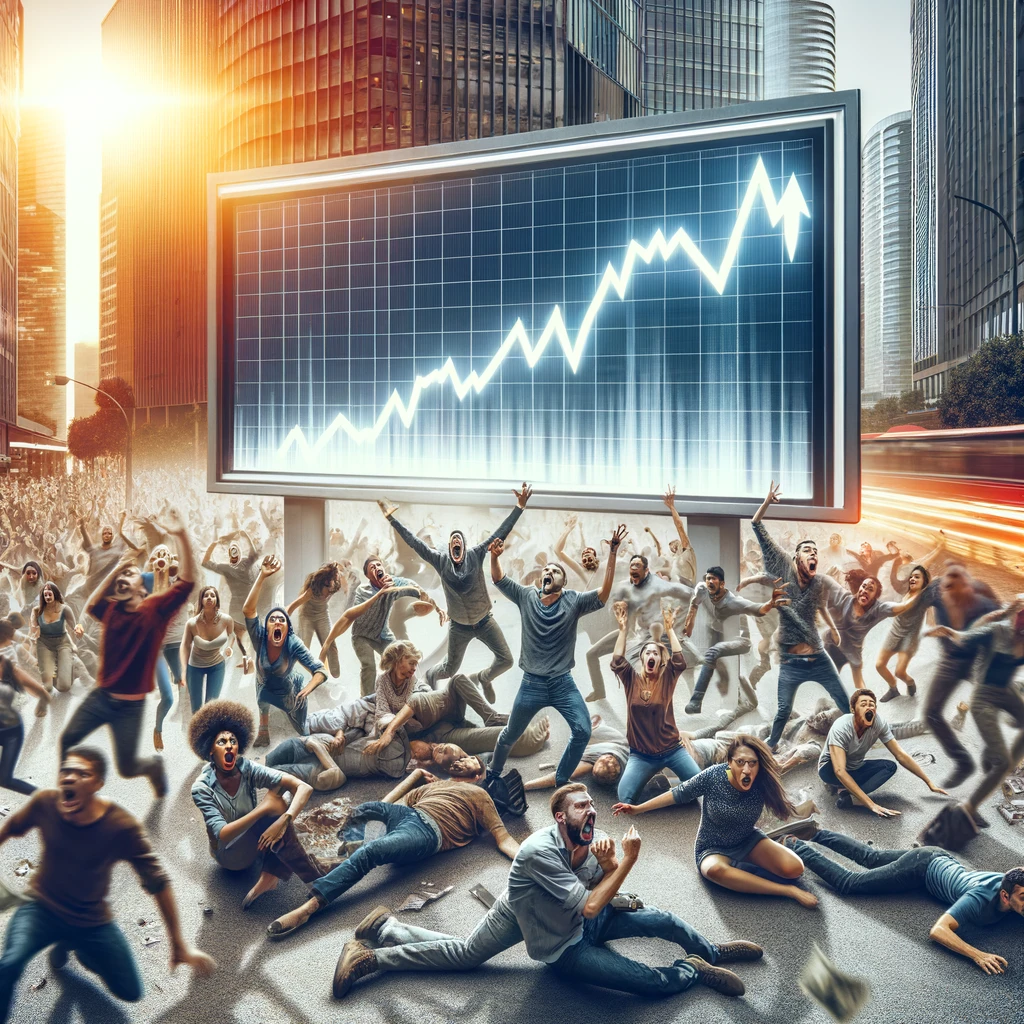

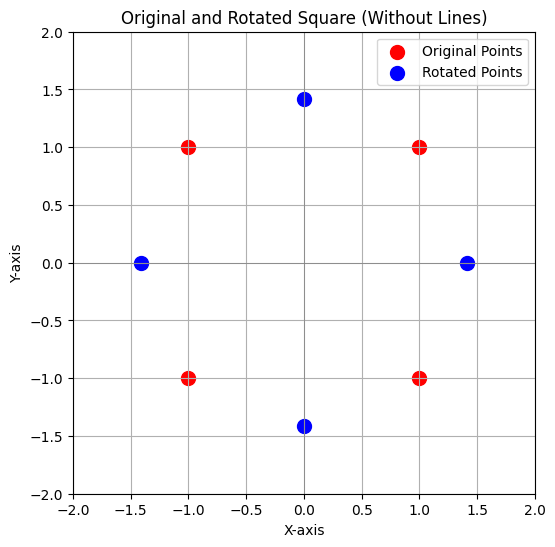

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the four points of the square
square_points = np.array([
    [-1, -1],
    [1, -1],
    [-1, 1],
    [1, 1]
])

# Define the rotation matrix for 30 degrees
angle = np.radians(45)
rotation_matrix = np.array([
    [np.cos(angle), -np.sin(angle)],
    [np.sin(angle), np.cos(angle)]
])

# Rotate the points
rotated_points = square_points @ rotation_matrix.T 

# Plot the original and rotated squares without connecting lines
plt.figure(figsize=(6, 6))
plt.scatter(square_points[:, 0], square_points[:, 1], color='red', s=100, label='Original Points')
plt.scatter(rotated_points[:, 0], rotated_points[:, 1], color='blue', s=100, label='Rotated Points')

# Add labels, grid, and legend
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid(True)
plt.legend()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Original and Rotated Square (Without Lines)")

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()





In [7]:
rotated_points

array([[-1.11022302e-16, -1.41421356e+00],
       [ 1.41421356e+00, -1.11022302e-16],
       [-1.41421356e+00,  1.11022302e-16],
       [ 1.11022302e-16,  1.41421356e+00]])

In [8]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

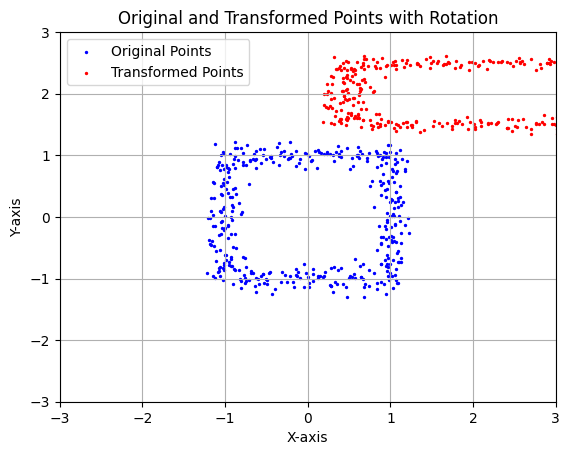

In [42]:
import numpy as np
import matplotlib.pyplot as plt


# Generate random points along the edges of a square
def generate_square_points(n):
    edge_points = n // 4
    top_edge = np.column_stack((np.linspace(-1, 1, edge_points), np.ones(edge_points)))
    bottom_edge = np.column_stack((np.linspace(-1, 1, edge_points), -np.ones(edge_points)))
    left_edge = np.column_stack((-np.ones(edge_points), np.linspace(-1, 1, edge_points)))
    right_edge = np.column_stack((np.ones(edge_points), np.linspace(-1, 1, edge_points)))
    return np.vstack((top_edge, bottom_edge, left_edge, right_edge))

# Number of points
n_points = 400

# Generate points
X = generate_square_points(n_points) + np.random.normal(0, 0.1, (n_points, 2))

# Define the transformation matrix A and the shift vector b
A = np.array([[1.5, 0],
              [0, 0.5]])
b = np.array([2, 2])

# Angle conversion from degrees to radians
angle = 0 * np.pi / 180  # 30 degrees in radians

# Rotation matrix R for 30 degrees
R = np.array([[np.cos(angle), -np.sin(angle)],
              [np.sin(angle),  np.cos(angle)]])


# Apply the transformations and shift
#Y = A @ R @ X.T + b[:, np.newaxis]
Y = R @ A @ X.T  + b[:, np.newaxis]
Y = Y.T  # Transpose back to original shape for plotting


# Plotting the datasets
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color='blue', label='Original Points', s=2)
ax.scatter(Y[:, 0], Y[:, 1], color='red', label='Transformed Points', s=2)
ax.legend()
ax.set_title('Original and Transformed Points with Rotation')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
plt.grid(True)
plt.show()


# Czym jest Machine Learning?

Na potrzeby tego wykładu istotę uczenia maszynowego można skrócić do następującego pytania:

**jaka transformacja doprowadziła do zmiany niebieskiego kwadratu w czerwony czworokąt?**

In [43]:
import torch
import torch.nn as nn
import numpy as np

# 1. Data Preparation
# Let's create some sample data, for example purposes:
# np.random.seed(0)
X = torch.from_numpy(X.astype(np.float32))  # 100 samples, 2 features
# true_W = torch.tensor([[2.0, -1.0], [1.5, 1.0]])
# true_b = torch.tensor([0.5, -0.5])
Y = torch.from_numpy(Y.astype(np.float32))

# 2. Model Definition
# Initialize weights and biases with random values
W = torch.randn((2, 2), requires_grad=True)
b = torch.randn(2, requires_grad=True)

# 3. Loss Function
loss_fn = nn.MSELoss()

# 4. Optimizer
optimizer = torch.optim.SGD([W, b], lr=0.01)

# 5. Training Loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Predict Y
    Y_pred = torch.matmul(X, W.t()) + b
    
    # Compute and print loss
    loss = loss_fn(Y_pred, Y)
    
    # Zero gradients, perform a backward pass, and update the weights and biases.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Check learned weights and biases
print(f"Learned weights:\n{W}")
print(f"Learned biases:\n{b}")


Epoch 100, Loss: 1.344304084777832
Epoch 200, Loss: 0.26354748010635376
Epoch 300, Loss: 0.05687904730439186
Epoch 400, Loss: 0.013196459971368313
Epoch 500, Loss: 0.0032095485366880894
Epoch 600, Loss: 0.0008027019212022424
Epoch 700, Loss: 0.00020390823192428797
Epoch 800, Loss: 5.223705375101417e-05
Epoch 900, Loss: 1.3442466297419742e-05
Epoch 1000, Loss: 3.4676434097491438e-06
Learned weights:
tensor([[ 1.4993e+00, -3.0396e-03],
        [ 1.0122e-04,  4.9938e-01]], requires_grad=True)
Learned biases:
tensor([1.9998, 1.9999], requires_grad=True)


In [44]:
W.detach().numpy().round(3)

array([[ 1.499, -0.003],
       [ 0.   ,  0.499]], dtype=float32)

In [45]:
Y_pred = Y_pred.detach().numpy()

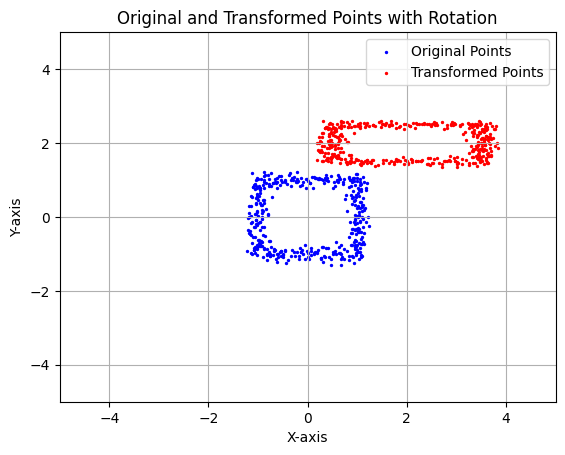

In [46]:
# Plotting the datasets
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color='blue', label='Original Points', s=2)
ax.scatter(Y_pred[:, 0], Y_pred[:, 1], color='red', label='Transformed Points', s=2)
ax.legend()
ax.set_title('Original and Transformed Points with Rotation')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
plt.grid(True)
plt.show()

# y = ax + b 

In [66]:
def get_1d_data(n_samples=3, a=8, b=98):
  # Wylosujmy wartości z przedziału [50, 120)
  X = torch.rand(n_samples) * 70 + 50
  # Prawdziwy wzór na dane
  y = a * X**(2.44) + b
  # Dodajmy szum do obserwacji
  y += torch.randn_like(y) * 60.0 
  return X, y

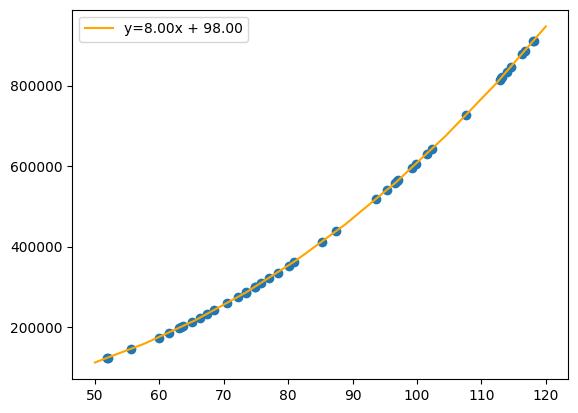

In [67]:
a_true = 8
b_true = 98
X, y = get_1d_data(n_samples=44, a=a_true, b=b_true)

X_lin = torch.linspace(50, 120, 10)
y_true = a_true * X_lin**(2.44) + b_true

plt.scatter(X, y)
plt.plot(X_lin, y_true, c='orange', label=f'y={a_true:.2f}x + {b_true:.2f}')
plt.legend()
plt.show()

In [16]:
class LinearRegression1D():
  def __init__(self):
    self.a = None
    self.b = None

  def predict(self, X):
    return self.a * X + self.b

  def estimate_params(self, X, y):
    sum_x = torch.sum(X)
    sum_y = torch.sum(y)
    sum_xy = torch.sum(X * y)
    sum_x2 = torch.sum(X * X)
    n = X.shape[0]

    self.a = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    self.b = (sum_y - self.a * sum_x) / n

In [50]:
X.shape,y.shape

(torch.Size([44]), torch.Size([44]))

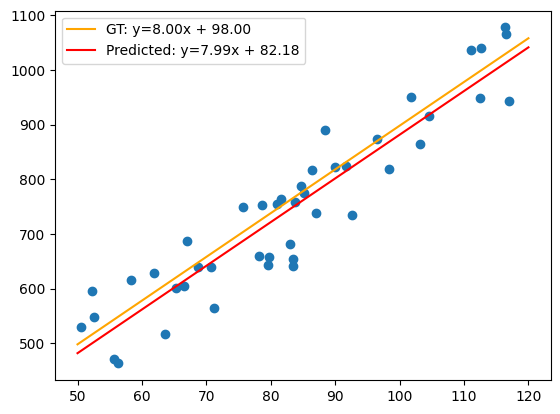

In [17]:
model_1d = LinearRegression1D()
model_1d.estimate_params(X, y)

y_pred = model_1d.predict(X_lin)

plt.scatter(X, y)
plt.plot(X_lin, y_true, c='orange', label=f'GT: y={a_true:.2f}x + {b_true:.2f}')
plt.plot(X_lin, y_pred, c='red', label=f'Predicted: y={model_1d.a:.2f}x + {model_1d.b:.2f}')
plt.legend()
plt.show()

In [53]:
X.shape

torch.Size([44])

In [56]:
X**2

tensor([ 7746.9180,  3602.8010,  5598.0654, 12364.6689,  8557.0400,  9342.7803,
         4595.2700,  5929.9189, 10781.8984,  5745.0254,  6953.4951,  3935.5352,
         5614.2031,  6237.0659,  7696.3208,  5302.2456,  8671.2764, 11822.1807,
         2634.6270,  4340.1309, 13210.0166, 12635.8818,  3525.6538, 10823.1836,
        12163.4854,  6697.1494, 10213.6562,  8603.1143,  4634.7017, 12249.5479,
        10912.9199,  5414.1152,  7631.3804,  5120.3550,  2634.0791, 10157.3711,
        11629.1650,  8364.0254,  8173.8364,  6078.6099, 10429.6904, 10090.3428,
         9374.9561,  7837.5879])

# Wielomian

In [68]:
def add_powers(degree, X):
  powers = torch.arange(degree).flip(0)
  X_powers = X[:, None] ** powers
  return X_powers

def calculate_polynomial(coeffs, X):
  if not isinstance(coeffs, torch.Tensor):
    coeffs = torch.tensor(coeffs).float()
  X_powers = add_powers(len(coeffs), X)
  y = X_powers @ coeffs
  return y

def get_polynomial(coeffs, n_samples=100):
  # Wylosujmy wartości z przedziału [0, 7)
  X = torch.rand(n_samples) * 7
  # Prawdziwy wzór na dane
  y = calculate_polynomial(coeffs, X)
  # Dodajmy szum do obserwacji
  y += torch.randn_like(y) / 60
  return X, y

In [70]:
X[:5]

tensor([96.6077, 99.8116, 52.0799, 73.4269, 70.5555])

In [69]:
add_powers(3, X[:5])

tensor([[9.3331e+03, 9.6608e+01, 1.0000e+00],
        [9.9624e+03, 9.9812e+01, 1.0000e+00],
        [2.7123e+03, 5.2080e+01, 1.0000e+00],
        [5.3915e+03, 7.3427e+01, 1.0000e+00],
        [4.9781e+03, 7.0555e+01, 1.0000e+00]])

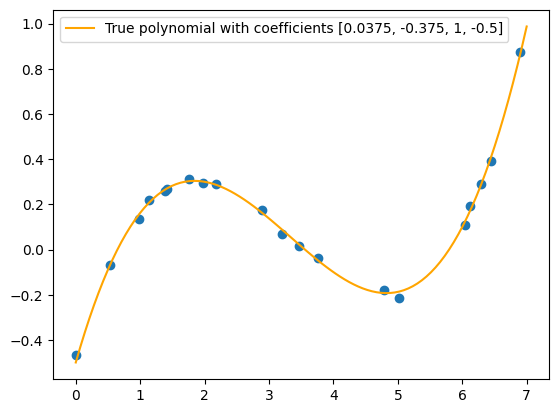

In [71]:
coeffs = [0.0375, -0.375, 1, -0.5]
X, y = get_polynomial(coeffs, n_samples=20)

X_lin = torch.linspace(0, 7, 100)
y_true = calculate_polynomial(coeffs, X_lin)

plt.scatter(X, y)
plt.plot(X_lin, y_true, c='orange', label=f'True polynomial with coefficients {coeffs}')
plt.legend()
plt.show()

In [73]:
class LinearRegressionPoly():
  def __init__(self, degree):
    self.degree = degree
    self.theta = None

  def predict(self, X):
    y = calculate_polynomial(self.theta, X)
    return y

  def estimate_params(self, X, y):
    X_powers = add_powers(self.degree + 1, X)
    self.theta = torch.inverse(X_powers.T @ X_powers) @ X_powers.T @ y

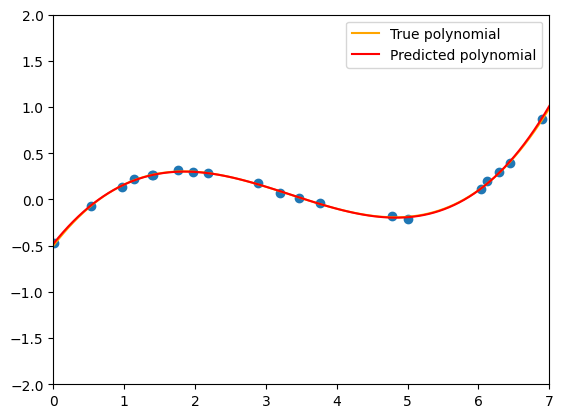

[0.0375, -0.375, 1, -0.5]
tensor([ 3.5845e-04,  3.2640e-02, -3.5295e-01,  9.6153e-01, -4.8005e-01])


In [75]:
import matplotlib.pyplot as plt

# Assuming model_poly, X, y, X_lin, and y_true are defined correctly
model_poly = LinearRegressionPoly(4)
model_poly.estimate_params(X, y)

y_pred = model_poly.predict(X_lin)

plt.scatter(X, y)
plt.plot(X_lin, y_true, c='orange', label='True polynomial')
plt.plot(X_lin, y_pred, c='red', label='Predicted polynomial')
plt.legend()
plt.xlim(0, 7)   # Set x-axis limits
plt.ylim(-2, 2)  # Set y-axis limits
plt.show()

print(coeffs)  # Assuming 'coeffs' is defined and contains coefficients of the true polynomial
print(model_poly.theta)  # Assuming 'theta' is the parameter attribute of model_poly


# Why polynomial features?

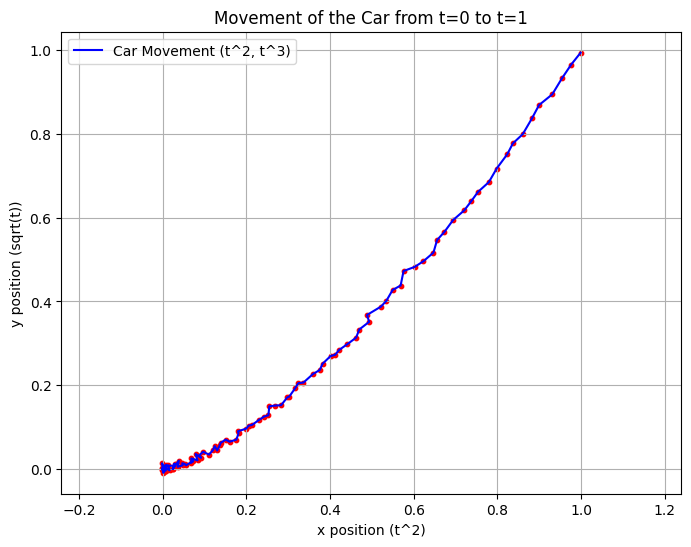

In [80]:
# Import necessary libraries for a self-contained implementation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Define the time range from 0 to 1
t_values = np.linspace(0, 1, 100).reshape(-1, 1)

# Define the positions of the car at time t using degree 3 polynomial for y
x_values = t_values**(2.37)
y_values = t_values**(3.45)

# Add small random noise to the original positions
np.random.seed(42)  # for reproducibility
x_values_noisy = x_values + np.random.normal(0, 0.005, size=x_values.shape)
y_values_noisy = y_values + np.random.normal(0, 0.005, size=y_values.shape)

# Plotting the points
plt.figure(figsize=(8, 6))
plt.plot(x_values_noisy, y_values_noisy, label='Car Movement (t^2, t^3)', color='blue')
plt.scatter(x_values_noisy, y_values_noisy, color='red', s=10)  # scatter points for better visibility
plt.xlabel('x position (t^2)')
plt.ylabel('y position (sqrt(t))')
plt.title('Movement of the Car from t=0 to t=1')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


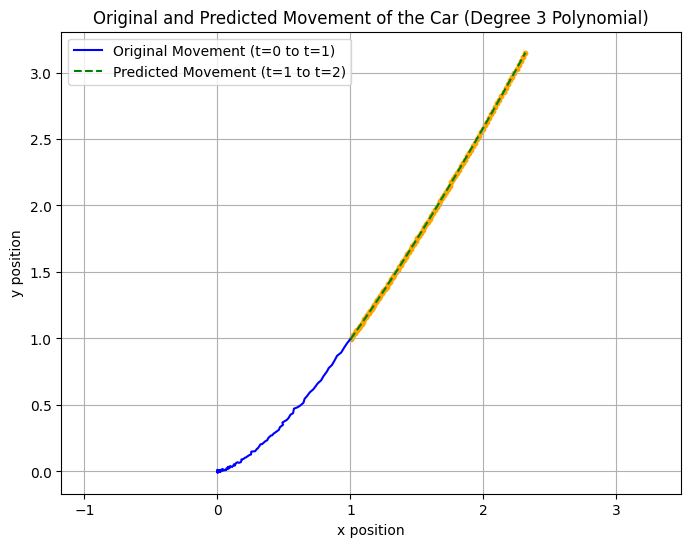

In [81]:


# Prepare the dataset with polynomial features (degree=3)
poly = PolynomialFeatures(degree=3)
t_poly_train = poly.fit_transform(t_values)

# Prepare the positions as the target variables
xy_train = np.hstack((x_values, y_values))  # Combine x and y positions

# Fit linear regression model with polynomial features
model_xy = LinearRegression()
model_xy.fit(t_poly_train, xy_train)

# Generate new time range from 1 to 2 for predictions
t_values_pred = np.linspace(1, np.sqrt(2), 100).reshape(-1, 1)
t_poly_pred = poly.transform(t_values_pred)

# Predict both x and y positions for the new time range from t=1 to t=2
xy_pred = model_xy.predict(t_poly_pred)
x_pred, y_pred = xy_pred[:, 0], xy_pred[:, 1]

# Plotting the original and predicted movement
plt.figure(figsize=(8, 6))

# Plotting the original movement from t=0 to t=1
plt.plot(x_values_noisy, y_values_noisy, label='Original Movement (t=0 to t=1)', color='blue')

# Plotting the predicted movement from t=1 to t=2
plt.plot(x_pred, y_pred, label='Predicted Movement (t=1 to t=2)', color='green', linestyle='--')
plt.scatter(x_pred, y_pred, color='orange', s=10)

plt.xlabel('x position')
plt.ylabel('y position')
plt.title('Original and Predicted Movement of the Car (Degree 3 Polynomial)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


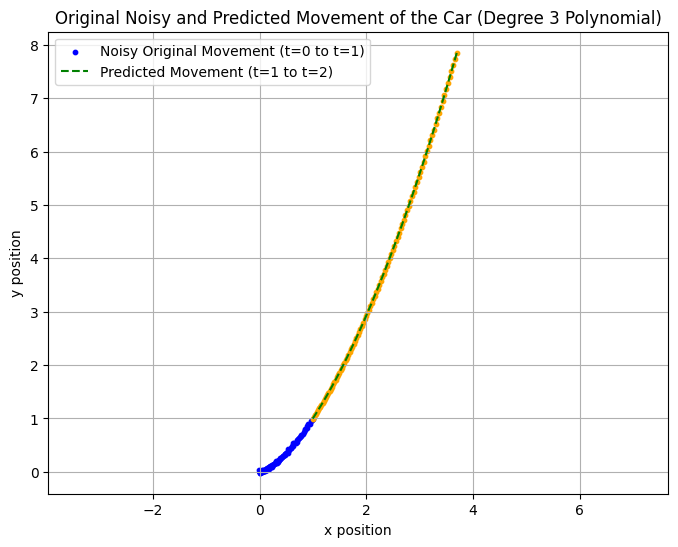

In [82]:
# Import necessary libraries for a self-contained implementation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Define the time range from 0 to 1
t_values = np.linspace(0, 1, 100).reshape(-1, 1)

# Define the positions of the car at time t using degree 3 polynomial for y
x_values = t_values**2
y_values = t_values**3

# Add small random noise to the original positions
np.random.seed(42)  # for reproducibility
x_values_noisy = x_values + np.random.normal(0, 0.01, size=x_values.shape)
y_values_noisy = y_values + np.random.normal(0, 0.01, size=y_values.shape)

# Prepare the dataset with polynomial features (degree=3)
poly = PolynomialFeatures(degree=3)
t_poly_train = poly.fit_transform(t_values)

# Prepare the noisy positions as the target variables
xy_train_noisy = np.hstack((x_values_noisy, y_values_noisy))  # Combine x and y positions with noise

# Fit linear regression model with polynomial features
model_xy = LinearRegression()
model_xy.fit(t_poly_train, xy_train_noisy)

# Generate new time range from 1 to 2 for predictions
t_values_pred = np.linspace(1, 2, 100).reshape(-1, 1)
t_poly_pred = poly.transform(t_values_pred)

# Predict both x and y positions for the new time range from t=1 to t=2
xy_pred = model_xy.predict(t_poly_pred)
x_pred, y_pred = xy_pred[:, 0], xy_pred[:, 1]

# Plotting the original and predicted movement
plt.figure(figsize=(8, 6))

# Plotting the original movement from t=0 to t=1 (with noise)
plt.scatter(x_values_noisy, y_values_noisy, label='Noisy Original Movement (t=0 to t=1)', color='blue', s=10)

# Plotting the predicted movement from t=1 to t=2
plt.plot(x_pred, y_pred, label='Predicted Movement (t=1 to t=2)', color='green', linestyle='--')
plt.scatter(x_pred, y_pred, color='orange', s=10)

plt.xlabel('x position')
plt.ylabel('y position')
plt.title('Original Noisy and Predicted Movement of the Car (Degree 3 Polynomial)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
